<b>IMPORTING RELEVANT LIBRARIES<B>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<B> IMPORTING DATASET <B>

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv',encoding='latin-1')

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df = df.replace('Nan',np.nan)

In [5]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

<b>HANDLING MISSING VALUES</b>

In [6]:
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values

Index(['category', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
numerical_columns = df.select_dtypes(include='float64')
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

categorial_columns = df.select_dtypes(include='object')
categorial_columns = categorial_columns.columns[categorial_columns.isnull().any()]
df[categorial_columns] = df[categorial_columns].fillna(df[categorial_columns].mode().iloc[0])

missing_values_checked = df.isnull().any()
print(missing_values_checked)

rank                                       False
Youtuber                                   False
subscribers                                False
video views                                False
category                                   False
Title                                      False
uploads                                    False
Country                                    False
Abbreviation                               False
channel_type                               False
video_views_rank                           False
country_rank                               False
channel_type_rank                          False
video_views_for_the_last_30_days           False
lowest_monthly_earnings                    False
highest_monthly_earnings                   False
lowest_yearly_earnings                     False
highest_yearly_earnings                    False
subscribers_for_last_30_days               False
created_year                               False
created_month       

In [8]:
df['channel_type'].unique()

array(['Music', 'Games', 'Entertainment', 'Education', 'People', 'Sports',
       'Film', 'News', 'Comedy', 'Howto', 'Nonprofit', 'Autos', 'Tech',
       'Animals'], dtype=object)

In [9]:
df['created_year'] = df['created_year'].astype(int)
df['created_year']

0      2006
1      2006
2      2012
3      2006
4      2006
       ... 
990    2017
991    2018
992    2006
993    2012
994    2017
Name: created_year, Length: 995, dtype: int32

<b>DATA VISUALIZATION <b>

TOP 10 YOUTUBE CHANNELS BY SUBSCRIPTION

In [10]:
sorted_df = df.sort_values(by ='subscribers' , ascending = False)

top_10_youtube_channels = sorted_df.head(10)

fig = go.Figure()

fig = px.bar(x = top_10_youtube_channels['Youtuber'] , y = top_10_youtube_channels['subscribers'] , title ='Top 10 Youtube Channels by Subscribers' , labels = dict(x = 'Channel' , y = 'Number of Subscribers') , text = top_10_youtube_channels['subscribers']/1000000)

fig.show()

DISTRIBUTION OF YOUTUBE CHANNEL TYPES

In [11]:
fig = px.sunburst(df , path =['channel_type'] , color_discrete_sequence = px.colors.qualitative.Set2)

fig.update_layout(title_text = 'Distribution of Youtube Channel Types' , height = 900)

fig.show()

SUBSCRIBERS VS VIDEO VIEWS

In [12]:
fig = px.scatter(df , x = 'subscribers' , y = 'video views' , size = 'video_views_for_the_last_30_days' , color = 'category' , 
                  hover_name = 'Youtuber' , hover_data = ['Country'] , size_max = 40 , labels = dict(x = 'Subscribers (in Billions)' , y = 'Video Views (in Billions)') )

fig.update_layout(title_text = "Subscribers Vs Video Views" , xaxis_type = 'log' , yaxis_type = "log")

fig.show()

TOP 10 HIGHEST MONTHLY EARNING YOUTUBERS 

In [13]:
sorted_df = df.sort_values(by = 'highest_monthly_earnings' , ascending = False)

top_10_monthly_earn_yts = sorted_df.head(10)

fig = px.bar(x = top_10_monthly_earn_yts['Youtuber'] , y = top_10_monthly_earn_yts['highest_monthly_earnings'] , title = "Top 10 Highest Monthly Earning Youtubers" , labels = dict(x = "Youtuber" , y = "Monthly Earning") , text = top_10_monthly_earn_yts['highest_monthly_earnings'])

fig.show()

TOTAL CHANNEL CREATED PER YEAR

In [14]:
sorted_df = df['created_year'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x = sorted_df.index , y = sorted_df.values , line_color = 'darkred' , fill = 'tozeroy' , mode = 'lines+markers'))

fig.update_layout(title_text = "Youtube Channel per Year" , xaxis_title = "Year" , yaxis_title = "Number of Channels")

fig.show()

<b>EARNING ANALYSIS</b>

VIDEO VIEWS , UPLOADS , SUBSCRIBERS VS YEARLY EARNINGS

In [15]:
df['average_yearly_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

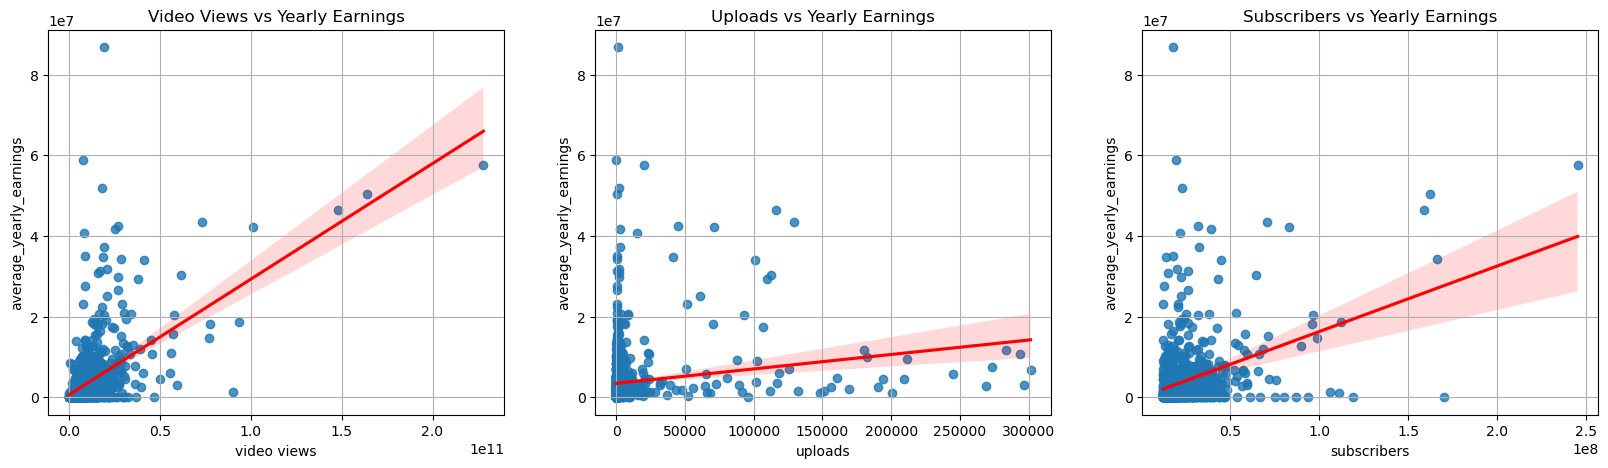

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

sns.regplot(ax=axs[0], data=df, x='video views', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='uploads', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[2], data=df, x='subscribers', y='average_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Video Views vs Yearly Earnings')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')
axs[2].grid(True)
axs[2].set_title('Subscribers vs Yearly Earnings')
plt.show()

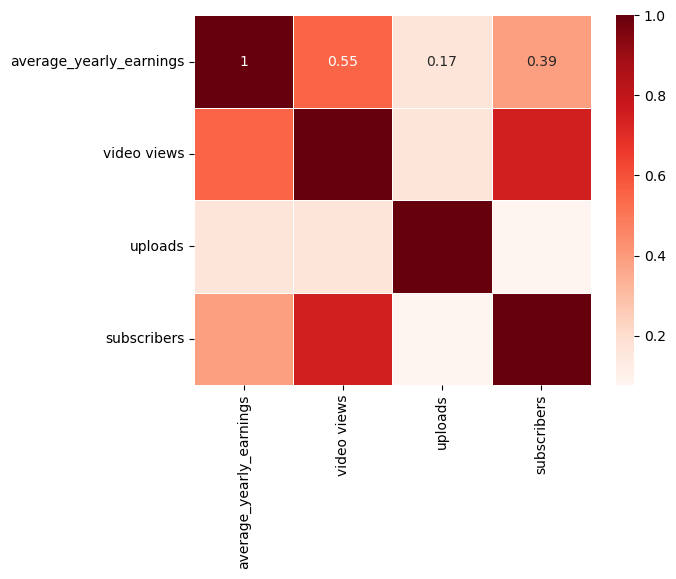

In [17]:
df_corr = df[['average_yearly_earnings', 'video views', 'uploads', 'subscribers']]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='Reds')
plt.show()

CATEGORY VS YEARLY EARNING

In [18]:
categories = df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=False)

fig = go.Figure(data = px.bar(x = categories.index , y = categories.values , color = categories.index ,title = "Average_Yearly_Earning vs Category" , text = np.round(categories.values/1000000,2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'black'

fig.update_layout(xaxis_title = 'Category' , yaxis_title = 'Average Yearly Earning')

fig.show()

COUNTRY VS TOTAL YOUTUBERS

In [25]:
number_of_youtubers = df.groupby('Country')['Youtuber'].count().sort_values(ascending=False)

top_youtubers = number_of_youtubers.head(10)

fig = go.Figure(data = px.bar(x = top_youtubers.index , y = top_youtubers.values , color = top_youtubers.index ,title = "Top 10 Country with Number of Youtubers" , text = top_youtubers.values))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'black'

fig.update_layout(xaxis_title = 'Country' , yaxis_title = 'Number of Youtubers')

fig.show()